### Imports

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder

### Data

In [38]:
train = pd.read_csv('../datasets/Selected train data.csv')
test = pd.read_csv('../datasets/Selected test data1.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Preprocessing and Feature Engineering

In [25]:
train

,Id,Overall Qual,Year Built,Full Bath,Half Bath,Garage Area,Total Bsmt SF,Gr Liv Area,1st Flr SF,2nd Flr SF,SalePrice
0,109,6,1976,2,1,475.0,725.0,1479,725,754,130500
1,544,7,1996,2,1,559.0,913.0,2122,913,1209,220000
2,153,5,1953,1,0,246.0,1057.0,1057,1057,0,109000
3,318,5,2006,2,1,400.0,384.0,1444,744,700,174000
4,255,6,1900,2,0,484.0,676.0,1445,831,614,138500
5,138,6,1966,2,1,578.0,1517.0,1888,1888,0,190000
6,2827,6,2005,2,0,525.0,547.0,1072,1072,0,140000
7,145,5,1959,1,0,531.0,1188.0,1188,1188,0,142000
8,1942,5,1952,1,0,420.0,924.0,924,924,0,112500
9,1956,5,1969,1,2,504.0,1040.0,2080,1040,1040,135000


In [26]:
# Fullbath x halfbath
train['FbathxHbath'] = train['Full Bath'] * train['Half Bath']
train.head()

,Id,Overall Qual,Year Built,Full Bath,Half Bath,Garage Area,Total Bsmt SF,Gr Liv Area,1st Flr SF,2nd Flr SF,SalePrice,FbathxHbath
0,109,6,1976,2,1,475.0,725.0,1479,725,754,130500,2
1,544,7,1996,2,1,559.0,913.0,2122,913,1209,220000,2
2,153,5,1953,1,0,246.0,1057.0,1057,1057,0,109000,0
3,318,5,2006,2,1,400.0,384.0,1444,744,700,174000,2
4,255,6,1900,2,0,484.0,676.0,1445,831,614,138500,0


<Axes: >

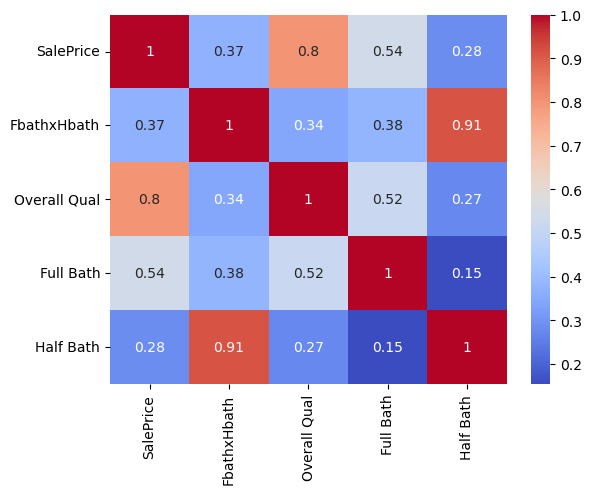

In [27]:
sns.heatmap(train[['SalePrice', 'FbathxHbath', 'Overall Qual', 'Full Bath', 'Half Bath']].corr(),
           cmap='coolwarm', annot=True)

In [29]:
X

,Id,Overall Qual,Year Built,Garage Area,Total Bsmt SF,Gr Liv Area,1st Flr SF,2nd Flr SF,FbathxHbath
0,109,6,1976,475.0,725.0,1479,725,754,2
1,544,7,1996,559.0,913.0,2122,913,1209,2
2,153,5,1953,246.0,1057.0,1057,1057,0,0
3,318,5,2006,400.0,384.0,1444,744,700,2
4,255,6,1900,484.0,676.0,1445,831,614,0
5,138,6,1966,578.0,1517.0,1888,1888,0,2
6,2827,6,2005,525.0,547.0,1072,1072,0,0
7,145,5,1959,531.0,1188.0,1188,1188,0,0
8,1942,5,1952,420.0,924.0,924,924,0,0
9,1956,5,1969,504.0,1040.0,2080,1040,1040,2


In [30]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [44]:
X_poly = poly.fit_transform(X.drop(columns=['Id']))
X_poly = pd.DataFrame(X_poly)
X_poly['Id'] = X['Id']

In [45]:
X_poly.to_csv('../datasets/Transformed Training data.csv', index=False)

In [46]:
polytest = PolynomialFeatures(degree=2, include_bias=False)
poly_test = poly.fit_transform(test.drop(columns=['Id']))
poly_test = pd.DataFrame(poly_test)
poly_test['Id'] = X['Id']
poly_test.to_csv('../datasets/Transformed Testing data.csv', index=False)